
# Project: Invastigating The Data of No Show Medical Appointments in Brazil

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project, I am invastigating the data of patients who miss or attend their appointments. My aim is to find some relationships between patients who doesn't show up to their appointments. The data contains informations about patients age, gender, scholarship program membership (welfare programme) and weather or not they have a medical history on some key diseases. Data also contains informations about hospitals neighborhood, schedule and appointment date, and if patients shows up their appointments or not.

Some of the observations that we will try to make is listed below:
* Are people enrolled in the Brazilian Welfare Program more likely to show up for their appointments?
* Are there any relationship between age of patients and their no-show data?
* Are certain key diseases affect the way people show up to their appointments?
* Does the hospital's neighbourhood affect people's attendance?
* What kind of effect does sending messages to patients have on appointments?

First we start

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In this section we will examine our data and try to create a cleaner dataset.

### General Properties

We declare our dataframe and take a look at the top 5 values for reference.

In [2]:
df= pd.read_csv('medical_appointment_details.csv') #declare dataframe
df.head() # get top 5 values

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Next I want to see the size of data that we are working with, and I want to see what its content looks like

In [3]:
df.shape # see the shape of data

(110527, 14)

In [4]:
df.describe() # see content

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


> From this data we can tell that 32% of the patients have received an sms before their appointments. Also 0.09% of them are part of the scholarship (Brazilian Wellfare) programme. Also I see some anomalies on age value, minimum age is -1 which doesn't really makes sense.

### Data Cleaning 

> I will start by taking a look if there is any null values in my data. I also will clear rows with minus age values and the columns I don't think that are usefull for my analysis.

To be able to determine if we have null values or not we will run the following step.

In [5]:
df.info() # get info about type and nulls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


Since there isn't any null values on columns, I will go ahead and drop the columns which I won't be using.

In [6]:
df.drop(['AppointmentID','ScheduledDay'],axis=1,inplace=True) #drop columns

I will also clear the rows with age values -1.

In [7]:
df = df[df['Age']>=0] #Get rows with age>=0

I will rename and remove "-" from the column names of SMS_received and No-show, so that it would match the rest of the columns

In [8]:
df.rename(columns= {'No-show':'NoShow', 'SMS_received':'SMSReceived'}, inplace = True) #rename columns

I will replace the Yes - No values on NoShow column with 1 -0 so that I can perform mathematical aggregation functions later.

In [9]:
df.NoShow = df.NoShow.eq('Yes').mul(1) #replace yes with 1 else 0

After I performed my changes, I want to take a one more look to my formatted data.

In [10]:
df.head()

,PatientId,Gender,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMSReceived,NoShow
0,2.987250e+13,F,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,5.589978e+14,M,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4.262962e+12,F,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,8.679512e+11,F,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8.841186e+12,F,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,0


In [11]:
df.describe()

,PatientId,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMSReceived,NoShow
count,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029,0.201934
std,2.560943e+14,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874,0.401445
min,3.920000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,9.999816e+14,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


<a id='eda'></a>
## Exploratory Data Analysis

> Now we will try to find some relationships between no-show conditions of patients.

### 1) Are people enrolled in the Brazilian Welfare Program more likely to show up for their appointments?

First I marked the rows so the No-show column name wouldn't be a confusion, also it would be easier to right code.

In [12]:
#assign values
showedup = df.NoShow == False
didnotshow = df.NoShow ==True

Let's take a look at the scholarship means of people who shows or doesn't show up.

In [13]:
df.Scholarship[showedup].mean() #get mean

0.093904111918555216

In [14]:
df.Scholarship[didnotshow].mean() #get mean

0.11550696715802679

Rates of people not showing up are higher when they have a scholarship. Let's compare them on a visual. I will draw a pie chart to see overall attendance rates.

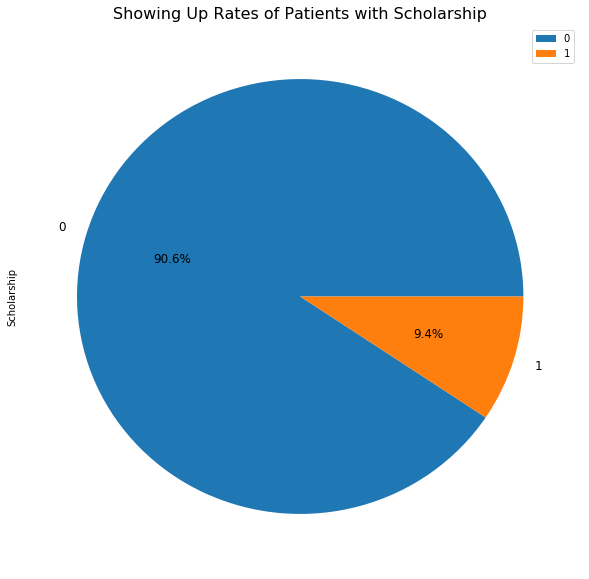

In [15]:
showed_count = df.Scholarship[showedup].value_counts() #count showed uos with scholarship
pie = showed_count.plot.pie(figsize=(10,10), autopct='%1.1f%%', fontsize = 12); #draw pie chart
pie.set_title("Showing Up Rates of Patients with Scholarship" , fontsize = 16); #set a title
plt.legend(); #place the legend

I also want to see the not show ups with scholarships.

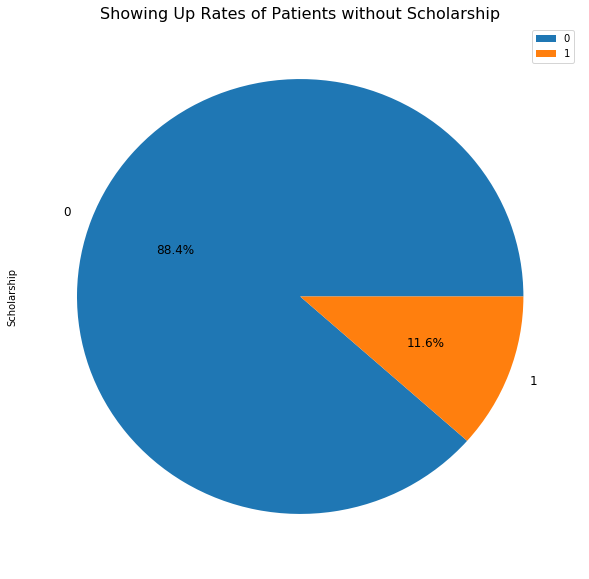

In [16]:
showed_count = df.Scholarship[didnotshow].value_counts()
pie = showed_count.plot.pie(figsize=(10,10), autopct='%1.1f%%', fontsize = 12);
pie.set_title("Showing Up Rates of Patients without Scholarship" , fontsize = 16);
plt.legend();

Overall, not showing up rates with scholarships are higher. But most of the people tend to attend their appointments.

### 2) Are there any relationship between age of patients and their no-show data?

As we did before, we can take a look at the age averages of show and no-show datas.

In [17]:
df.Age[showedup].mean() #get mean

37.790504154999034

In [18]:
df.Age[didnotshow].mean()

34.317666562121957

There is not much of an age difference between patients who shows ups and doesn't. I will draw the histograms for values above.

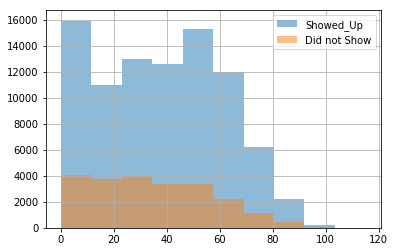

In [19]:
#draw histogram
df.Age[showedup].hist(alpha= 0.5 ,label = 'Showed_Up')
df.Age[didnotshow].hist(alpha= 0.5 , label = 'Did not Show')
plt.legend();

As age increases over 60, the difference between show ups to and not show ups to appointments decreases. Also when the patients age is really young, around 0, they are more likely to show up their appointments.

### 3) Are certain key diseases affect the way people show up to their appointments?

I will take a look at the show up rates for each disease.

In [20]:
df.Hipertension[showedup].mean()

0.20439420907637715

In [21]:
df.Diabetes[showedup].mean()

0.073837677281848382

In [22]:
df.Alcoholism[showedup].mean()

0.030417087079256749

In [23]:
df.Handcap[showedup].mean()

0.022741959254934416

I will create a plot function for my bar charts so that I can use it later easily.

In [24]:
#define function for bar chart
def plotMean(df,grpVar,yVar):
    df.groupby(grpVar)[yVar].mean().plot.bar(edgecolor = 'black', figsize=[10,6], rot = 0,);
    plt.title(f'Proportion of {yVar} by {grpVar}'.title(), fontsize=14,weight= "bold")
    plt.xlabel(grpVar.title(), fontsize=14,weight= "bold")
    plt.ylabel(yVar.title(), fontsize=14,weight= "bold")

We can see that patients with hipertension are more likely to attend. Let's see some more about with patients with hipertension.

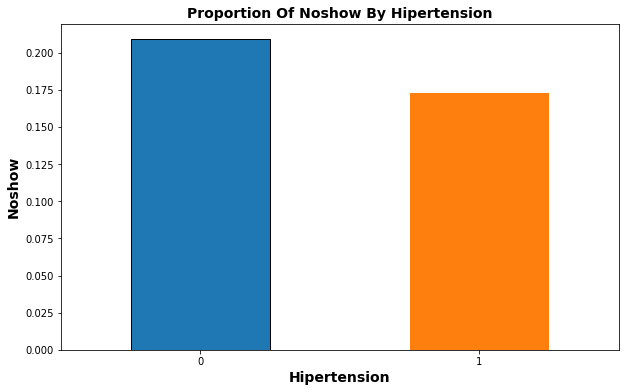

In [25]:
plotMean(df,'Hipertension','NoShow')

### 4) Does the hospital's neighbourhood affect people's attendance?

I will try to find the rate of attendance by grouping the data by neighborhood. Then sort the values.

In [26]:
df.groupby('Neighbourhood')['NoShow'].mean().sort_values() #get means sorted

Neighbourhood
PARQUE INDUSTRIAL              0.000000
ILHA DO BOI                    0.085714
AEROPORTO                      0.125000
MÁRIO CYPRESTE                 0.145553
SOLON BORGES                   0.147122
DE LOURDES                     0.154098
DO CABRAL                      0.157143
SANTA MARTHA                   0.158416
JARDIM DA PENHA                0.162755
DO QUADRO                      0.164900
VILA RUBIM                     0.165687
MORADA DE CAMBURI              0.166667
MATA DA PRAIA                  0.170807
REPÚBLICA                      0.171257
CONSOLAÇÃO                     0.172238
PONTAL DE CAMBURI              0.173913
SANTO ANTÔNIO                  0.176256
REDENÇÃO                       0.177077
NOVA PALESTINA                 0.177562
JABOUR                         0.179753
SANTA LUÍZA                    0.179907
COMDUSA                        0.180645
JOANA D´ARC                    0.180799
TABUAZEIRO                     0.182950
FORTE SÃO JOÃO            

Every patient in ILHAS OCEÂNICAS DE TRINDADE hospital has attended their appointments. No other neighborhood has such a high rate. Patients who are appointed at hospitals in that area always showed up to their appointment.

Text(0.5,0,'Neighbourhood')

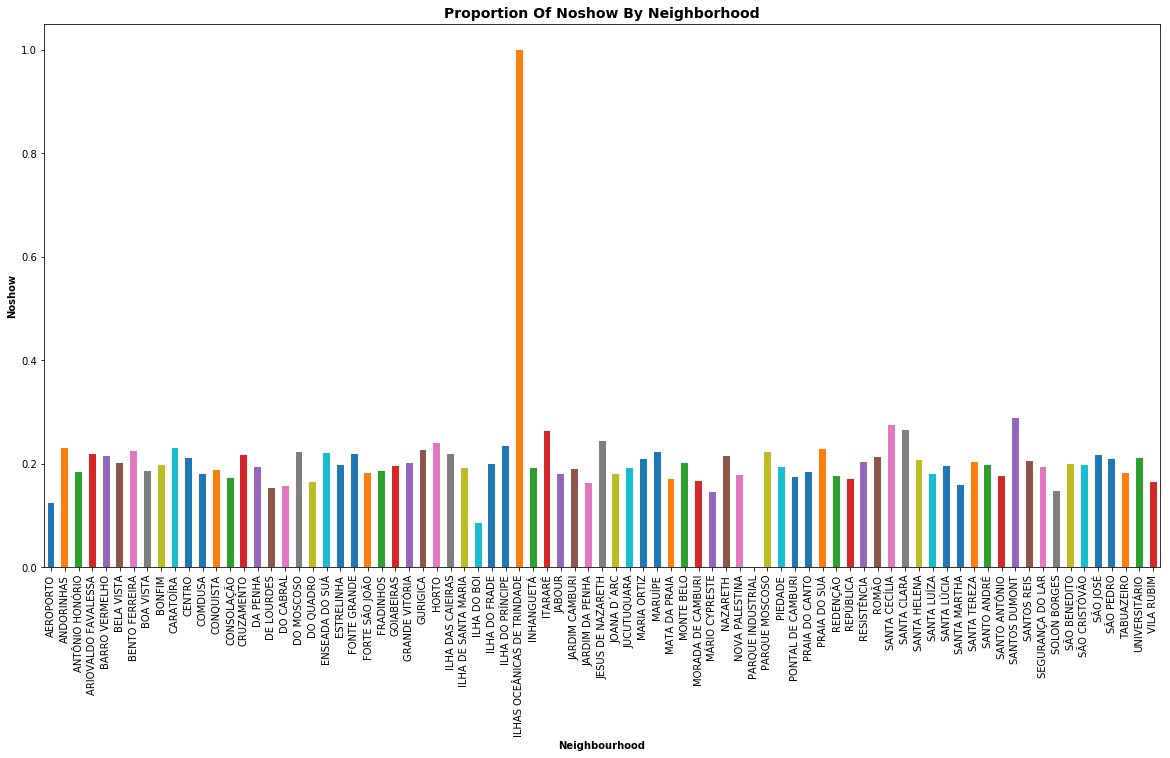

In [27]:
df.groupby('Neighbourhood')['NoShow'].mean().plot(kind = "bar", figsize=(20,10))
plt.title('Proportion of NoShow By Neighborhood'.title(),fontsize=14,weight= "bold")
plt.ylabel('NoShow'.title(),fontsize = 10, weight = "bold")
plt.xlabel('Neighbourhood'.title(),fontsize = 10, weight = "bold")

### 5) What kind of effect does sending messages to patients have on appointments?

Lets take a look at the rates of showing with SMS and without it.

NoShow
0    0.291337
1    0.438371
Name: SMSReceived, dtype: float64


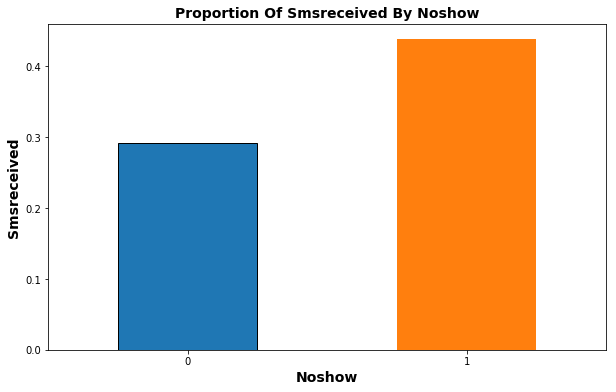

In [28]:
print(df.groupby('NoShow').SMSReceived.mean()) # print values
plotMean(df,'NoShow','SMSReceived') #custom plot function

Patients who does not receive an sms about their appointments are more likely to show up. I also want to see the sms receiving rates between genders.

Gender
F    0.336892
M    0.291571
Name: SMSReceived, dtype: float64


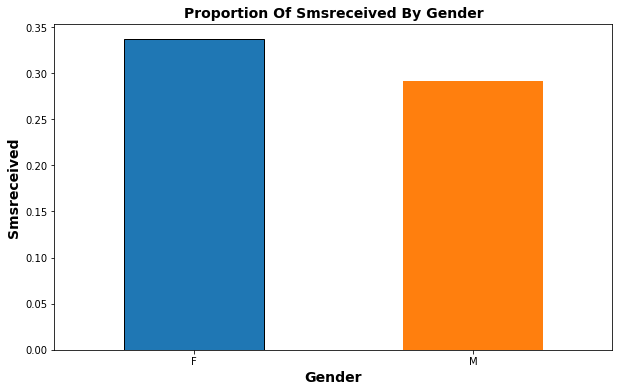

In [29]:
print(df.groupby('Gender').SMSReceived.mean())
plotMean(df,'Gender','SMSReceived')

Female patients receiving SMS rates are higher than the male ones.

<a id='conclusions'></a>
## Conclusions

We tried and investigated the data of patients who miss or attend their appointments in Brazil. We started by cleaning our data, which might cause wrong numbers for analysis and then do some format change on columns for further calculations.

Some of the findings for our main calculations:

* People who have scholarship are more likely to not show up their appointments.
* While age means doesn't have much of a difference between show ups and no show ups, after the age 60 showing and not showing up gap closes.
* Patients with hipertension are more likely to show up their appointments compared to other diseases.
* Patients who are appointed at hospitals in ILHAS OCEÂNICAS DE TRINDADE always showed up to their appointment.
* People who receive an SMS about their appointments are more likely to not show up. And female patients receiving SMS rates are higher than the male ones.

Also we had some limitations:

* Since the dataset is a sample one our analysis had to be according to only these datas, it couldn't include any real life observations, and can change with a different dataset.
* I would also like to know the patients neighborhood. So that we can check if the patients neighborhood is different from the hospitals and whether or not it affects the attendance.
Further information can be found about data set and mentioned wellfare programme below:

https://www.kaggle.com/joniarroba/noshowappointments

https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia

## Submitting the Project 


In [30]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0